In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from src.model.data import __version__

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score

from src.base import logger
from src.config import get_config
from src.model.data import make_dataset
from src.model.features import build_features
from src.model.preprocessing import PreProcessor

from sklearn.ensemble import RandomForestClassifier, GradientBoostingRegressor

#from xgboost import XGBClassifier


pd.options.display.max_columns = None

%config IPCompleter.use_jedi=False

In [125]:
# Getting data information
data_config = get_config(filename="config/model.yaml")
features_config = get_config(filename="config/features.yaml")

# Construct the dataset
data  = make_dataset(data_config, download_bases=False)
X,y = build_features(data)

# Splitting in train and test
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25, random_state=42)

# Train preprocessor
preprocessor = PreProcessor(features_config)
preprocessor.fit(X_train)

# Tranforming features
X_train = preprocessor.transform(X_train)
X_test = preprocessor.transform(X_test)

In [126]:
data_train = X_train.assign(y=y_train)

data_train.corr()['y'] #520687

n_parking_spaces    0.524207
n_bathrooms         0.549283
n_bedrooms          0.482339
y                   1.000000
Name: y, dtype: float64

In [96]:
np.corrcoef(X_train['n_bedrooms'], y_train)

array([[1.        , 0.45909141],
       [0.45909141, 1.        ]])

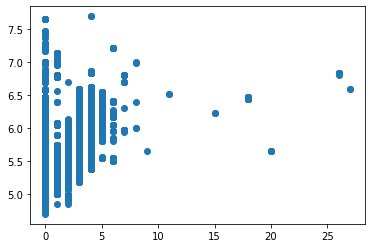

In [98]:
plt.scatter(X_train['n_bedrooms'], y_train)

plt.show()

<AxesSubplot:>

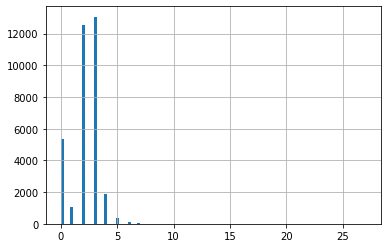

In [102]:
X_train['n_bedrooms'].hist(bins=100)

In [91]:
X.head(2)

,id,search_id,id_zap,type,n_parking_spaces,n_bathrooms,n_bedrooms,area,n_floors,units_on_floor,n_suites,state,city,neighborhood,street,longitude,latitude,condo_fee,iptu,resale,buildings,plan_only,search_date
0,1,2503300374__2021_06_04_00_23_37,2503300374,HOME,2.0,3.0,3.0,100.0,NaN,0,1.0,MG,Poços de Caldas,Jardim Das Hortênsias,None,NaN,NaN,NaN,NaN,0,0,0,2021-06-04
1,2,2462358530__2021_06_04_00_23_37,2462358530,APARTMENT,2.0,3.0,3.0,128.0,NaN,0,1.0,MG,Poços de Caldas,Centro,Rua Assis Figueiredo,-46.56683,-21.780617,0.0,0.0,0,0,0,2021-06-04


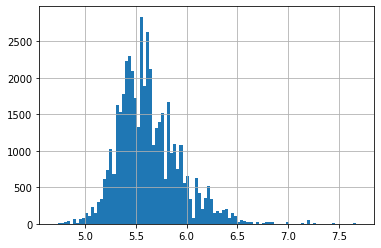

In [12]:
np.log10(y[y>0]).hist(bins=100)

plt.show()

In [8]:
# data_config = get_config(filename="config/model.yaml")

# features_config = get_config(filename="config/features.yaml")

# X,y  = make_dataset(data_config, download_bases=False)

# X,y = build_features(X, y)

# X_train, X_test, y_train, y_test = train_test_split(X,y,stratify=y, test_size=0.25, random_state=42)

# preprocessor = PreProcessor(features_config)

# preprocessor.fit(X_train)

# X_train = preprocessor.transform(X_train)

# X_test = preprocessor.transform(X_test)

# classifier = LogisticRegression(C=5)

# classifier.fit(X_train, y_train)

# classifier.predict_proba(X_test)[:,1]

# accuracy_score(y_test,classifier.predict(X_test))

0.68

In [9]:
from dotenv import load_dotenv
import psycopg2
import os
from sqlalchemy import create_engine
import pandas as pd
import numpy as np
assert load_dotenv()

engine = create_engine(
    "postgresql://{user}:{password}@{host}:{port}/{database}".format(
        user=os.getenv("DB_USERNAME"),
        password=os.getenv("DB_PASSWORD"),
        host=os.getenv("DB_HOST"),
        port=os.getenv("DB_PORT"),
        database=os.getenv("DB_NAME"),
    )
)

# amenities = pd.read_sql("""
# with tab as (
#     select *  from pocos_de_caldas.imoveis i limit 100
# )
# select search_id, jsonb_array_elements(amenities) as amenity, price from tab t
# """, engine)

# pois = pd.read_sql("""
# with tab as (
#     select *  from pocos_de_caldas.imoveis i limit 100
# )
# select search_id, jsonb_array_elements(pois_list) as pois, price from tab t
# """, engine)

In [10]:
from basix.parquet import write as to_parquet

In [10]:
df = pd.read_sql("""
    select
        id
        , search_id
        , search_date 
        , id_zap
        , type
        , jsonb_array_elements(amenities) as amenity
        , price
    from pocos_de_caldas.imoveis
""", engine)

# df['search_date'] = df['search_date'].dt.date

# to_parquet(df, "data/raw/", overwrite=True, partition_cols = ["search_date"] )



In [11]:
df

,id,search_id,search_date,id_zap,type,amenity,price
0,2,2462358530__2021_06_04_00_23_37,2021-06-04,2462358530,APARTMENT,GATED_COMMUNITY,950000.0
1,2,2462358530__2021_06_04_00_23_37,2021-06-04,2462358530,APARTMENT,ELEVATOR,950000.0
2,2,2462358530__2021_06_04_00_23_37,2021-06-04,2462358530,APARTMENT,SERVICE_AREA,950000.0
3,2,2462358530__2021_06_04_00_23_37,2021-06-04,2462358530,APARTMENT,BALCONY,950000.0
4,2,2462358530__2021_06_04_00_23_37,2021-06-04,2462358530,APARTMENT,MOUNTAIN_VIEW,950000.0
...,...,...,...,...,...,...,...
132651,46392,2565495224__2022_06_04_12_51_15,2022-06-04,2565495224,HOME,KITCHEN,2250000.0
132652,46392,2565495224__2022_06_04_12_51_15,2022-06-04,2565495224,HOME,POOL,2250000.0
132653,46392,2565495224__2022_06_04_12_51_15,2022-06-04,2565495224,HOME,BACKYARD,2250000.0
132654,46392,2565495224__2022_06_04_12_51_15,2022-06-04,2565495224,HOME,SERVICE_AREA,2250000.0
